In [6]:
from google.colab import files
data=files.upload()

Saving Article_Data.txt to Article_Data.txt


In [0]:
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, Activation, GRU, SimpleRNN
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import string
from sklearn.model_selection import train_test_split
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math

In [0]:
import pandas as pd
file=pd.read_csv('Article_Data.txt',sep='\t')
data=file[['Article Abstract','Impact Factor']]
data_filtered = data.dropna(how='any')
data_filtered.columns=['abs','fac']
data_filtered=data_filtered.drop_duplicates(subset="abs")
data_filtered['result'] = data_filtered['abs'].str.replace(r'(formula: see text)','')
df = data_filtered[data_filtered['result'].apply(lambda x: len(x.split(' ')) > 25)]
final=df[['result','fac']]
final.columns=['abs','fac']

In [0]:
X, y = (final['abs'].values, final['fac'].values)
text = [word for word in X if word not in string.ascii_letters]
tk = Tokenizer(lower = True)

In [0]:
tk.fit_on_texts(X)
X_seq = tk.texts_to_sequences(X)

In [6]:
X_pad = pad_sequences(X_seq, maxlen=1500, padding='post')
X_pad.shape

(20077, 1500)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size = 0.25, random_state = 1)

In [0]:
vocabulary_size = len(tk.word_counts.keys())+1
max_words = 1500
embedding_size = 100
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
opt_adam = optimizers.adam(lr=0.01)
model.compile(loss='binary_crossentropy', optimizer=opt_adam, metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 1500, 100)         8971600   
_________________________________________________________________
lstm_10 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 9,052,101
Trainable params: 9,052,101
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=1000,epochs=2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 15057 samples, validate on 5020 samples
Epoch 1/2
15057/15057 [==============================] - 498s 33ms/step - loss: 0.6327 - accuracy: 0.5301 - val_loss: 0.5915 - val_accuracy: 0.5382
Epoch 2/2
15057/15057 [==============================] - 496s 33ms/step - loss: 0.6061 - accuracy: 0.5392 - val_loss: 0.5902 - val_accuracy: 0.5382


In [0]:
###Building model with abstracts having impact factor > 0

In [0]:
final_new = final[final.fac > 0]

In [0]:
X, y = (final_new['abs'].values, final_new['fac'].values)
text = [word for word in X if word not in string.ascii_letters]
tk = Tokenizer(lower = True)

In [0]:
tk.fit_on_texts(X)
X_seq = tk.texts_to_sequences(X)

In [32]:
X_pad = pad_sequences(X_seq, maxlen=1500, padding='post')
X_pad.shape

(12142, 1500)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size = 0.25, random_state = 1)

In [0]:
vocabulary_size = len(tk.word_counts.keys())+1
max_words = 1500
embedding_size = 100
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 1500, 100)         6900300   
_________________________________________________________________
lstm_11 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 6,980,801
Trainable params: 6,980,801
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=1000,epochs=2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 9106 samples, validate on 3036 samples
Epoch 1/2
9106/9106 [==============================] - 312s 34ms/step - loss: -1.4239 - accuracy: 0.8489 - val_loss: -3.3860 - val_accuracy: 0.8906
Epoch 2/2
9106/9106 [==============================] - 299s 33ms/step - loss: -4.3912 - accuracy: 0.8914 - val_loss: -5.7084 - val_accuracy: 0.8906


In [38]:
print(model.history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


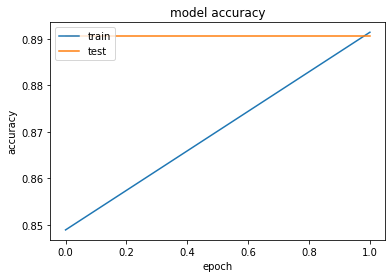

In [42]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

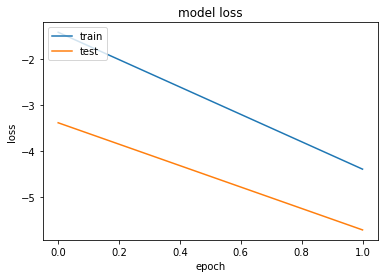

In [43]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

In [60]:
model1 = Sequential()
model1.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model1.add(GRU(100))
model1.add(Dropout(0.3))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model1.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=1000,epochs=2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 9106 samples, validate on 3036 samples
Epoch 1/2
9106/9106 [==============================] - 304s 33ms/step - loss: -0.1844 - accuracy: 0.8152 - val_loss: -2.0934 - val_accuracy: 0.8906
Epoch 2/2
9106/9106 [==============================] - 301s 33ms/step - loss: -2.4291 - accuracy: 0.8914 - val_loss: -2.6227 - val_accuracy: 0.8906


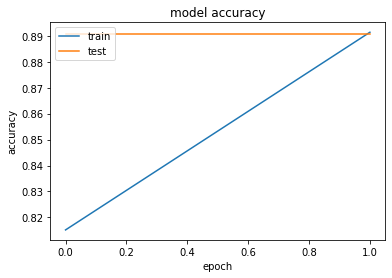

In [61]:
plt.plot(model1.history.history['accuracy'])
plt.plot(model1.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

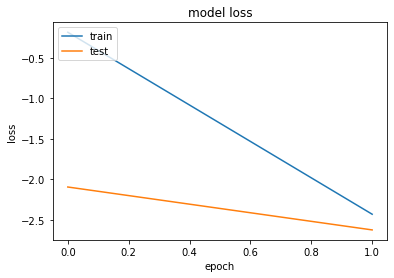

In [62]:
plt.plot(model1.history.history['loss'])
plt.plot(model1.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
trainPredict1 = model1.predict(X_train)
testPredict1 = model1.predict(X_test)

In [66]:
model2 = Sequential()
model2.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model2.add(SimpleRNN(100))
model2.add(Dropout(0.3))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model2.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=1000,epochs=2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 9106 samples, validate on 3036 samples
Epoch 1/2
9106/9106 [==============================] - 78s 9ms/step - loss: -0.3022 - accuracy: 0.8248 - val_loss: -1.1373 - val_accuracy: 0.8847
Epoch 2/2
9106/9106 [==============================] - 76s 8ms/step - loss: -1.4728 - accuracy: 0.8862 - val_loss: -1.7788 - val_accuracy: 0.8834


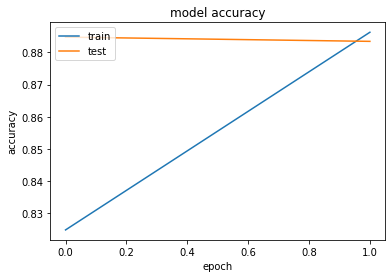

In [75]:
plt.plot(model2.history.history['accuracy'])
plt.plot(model2.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

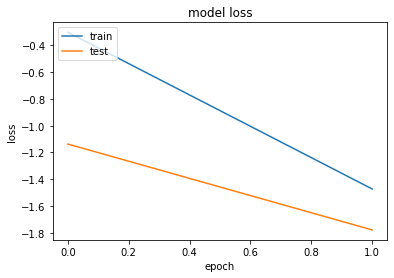

In [76]:
plt.plot(model2.history.history['loss'])
plt.plot(model2.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
df_50 = data_filtered[data_filtered['result'].apply(lambda x: len(x.split(' ')) > 50)]
final_50=df_50[['result','fac']]
final_50.columns=['abs','fac']
final_new_50 = final_50[final_50.fac > 0]
X, y = (final_new_50['abs'].values, final_new_50['fac'].values)
text = [word for word in X if word not in string.ascii_letters]
tk = Tokenizer(lower = True)
tk.fit_on_texts(X)
X_seq = tk.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=1500, padding='post')
X_pad.shape
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size = 0.25, random_state = 1)
vocabulary_size = len(tk.word_counts.keys())+1
max_words = 1500
embedding_size = 100

In [74]:
model3 = Sequential()
model3.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model3.add(LSTM(100))
model3.add(Dropout(0.3))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model3.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=1000,epochs=2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 9018 samples, validate on 3007 samples
Epoch 1/2
9018/9018 [==============================] - 289s 32ms/step - loss: -0.5240 - accuracy: 0.8556 - val_loss: -1.5430 - val_accuracy: 0.8926
Epoch 2/2
9018/9018 [==============================] - 298s 33ms/step - loss: -1.8478 - accuracy: 0.8899 - val_loss: -2.0947 - val_accuracy: 0.8926


In [0]:
trainPredict3 = model3.predict(X_train)
testPredict3 = model3.predict(X_test)

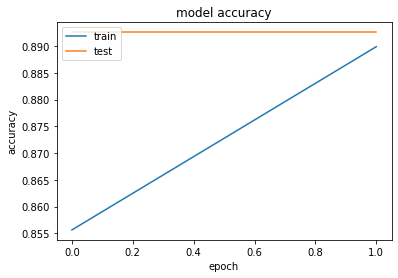

In [78]:
plt.plot(model3.history.history['accuracy'])
plt.plot(model3.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

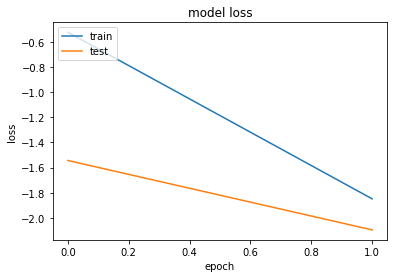

In [79]:
plt.plot(model3.history.history['loss'])
plt.plot(model3.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [77]:
model4 = Sequential()
model4.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model4.add(GRU(100))
model4.add(Dropout(0.3))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model4.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=1000,epochs=2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 9018 samples, validate on 3007 samples
Epoch 1/2
9018/9018 [==============================] - 295s 33ms/step - loss: -0.1202 - accuracy: 0.8156 - val_loss: -2.0487 - val_accuracy: 0.8926
Epoch 2/2
9018/9018 [==============================] - 288s 32ms/step - loss: -2.3851 - accuracy: 0.8899 - val_loss: -2.5436 - val_accuracy: 0.8926


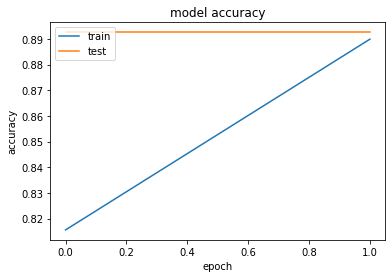

In [80]:
plt.plot(model4.history.history['accuracy'])
plt.plot(model4.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

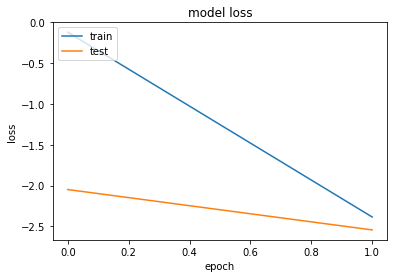

In [81]:
plt.plot(model4.history.history['loss'])
plt.plot(model4.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
trainPredict4 = model4.predict(X_train)
testPredict4 = model4.predict(X_test)

In [82]:
model5 = Sequential()
model5.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model5.add(SimpleRNN(100))
model5.add(Dropout(0.3))
model5.add(Dense(1, activation='sigmoid'))
model5.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model5.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=1000,epochs=2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 9018 samples, validate on 3007 samples
Epoch 1/2
9018/9018 [==============================] - 78s 9ms/step - loss: -0.4994 - accuracy: 0.8883 - val_loss: -1.1266 - val_accuracy: 0.8903
Epoch 2/2
9018/9018 [==============================] - 76s 8ms/step - loss: -1.4437 - accuracy: 0.8877 - val_loss: -1.7076 - val_accuracy: 0.8886


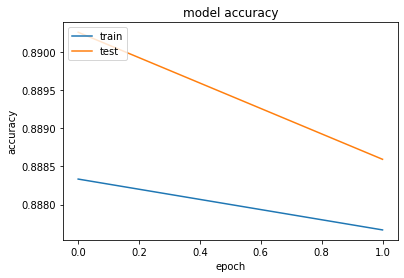

In [83]:
plt.plot(model5.history.history['accuracy'])
plt.plot(model5.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

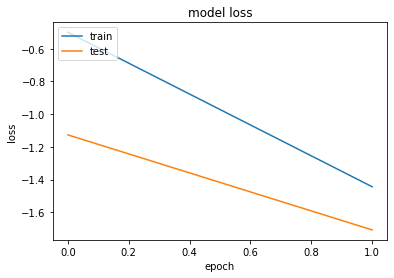

In [84]:
plt.plot(model5.history.history['loss'])
plt.plot(model5.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
trainPredict5 = model5.predict(X_train)
testPredict5 = model5.predict(X_test)

In [0]:
file=pd.read_csv('Article_Data.txt',sep='\t')
data=file[['Article Abstract','Impact Factor']]
data_filtered = data.dropna(how='any')
data_filtered.columns=['abs','fac']
data_filtered=data_filtered.drop_duplicates(subset="abs")
data_filtered['result'] = data_filtered['abs'].str.replace(r'(formula: see text)','')
df = data_filtered[data_filtered['result'].apply(lambda x: len(x.split(' ')) > 25)]
final=df[['result','fac']]
final.columns=['abs','fac']
final_new = final[final.fac > 0]
X, y = (final_new['abs'].values, final_new['fac'].values)
text = [word for word in X if word not in string.ascii_letters]
tk = Tokenizer(lower = True)
tk.fit_on_texts(X)
X_seq = tk.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=1500, padding='post')
X_pad.shape
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size = 0.25, random_state = 1)
vocabulary_size = len(tk.word_counts.keys())+1

In [90]:
max_words = 1500
embedding_size = 100
model6 = Sequential()
model6.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model6.add(LSTM(100))
model6.add(Dropout(0.3))
model6.add(Dense(1, activation='sigmoid'))
model6.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model6.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=1000,epochs=20)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 9106 samples, validate on 3036 samples
Epoch 1/20
9106/9106 [==============================] - 288s 32ms/step - loss: -0.5763 - accuracy: 0.8282 - val_loss: -1.7937 - val_accuracy: 0.8906
Epoch 2/20
9106/9106 [==============================] - 291s 32ms/step - loss: -2.1212 - accuracy: 0.8914 - val_loss: -2.3428 - val_accuracy: 0.8906
Epoch 3/20
9106/9106 [==============================] - 290s 32ms/step - loss: -2.5736 - accuracy: 0.8914 - val_loss: -2.7371 - val_accuracy: 0.8906
Epoch 4/20
9106/9106 [==============================] - 289s 32ms/step - loss: -2.9030 - accuracy: 0.8914 - val_loss: -3.0063 - val_accuracy: 0.8906
Epoch 5/20
9106/9106 [==============================] - 290s 32ms/step - loss: -3.1711 - accuracy: 0.8914 - val_loss: -3.2195 - val_accuracy: 0.8906
Epoch 6/20
9106/9106 [==============================] - 290s 32ms/step - loss: -3.3996 - accuracy: 0.8914 - val_loss: -3.4336 - val_accuracy: 0.8906
Epoch 7/20
9106/9106 [==============================] - 29

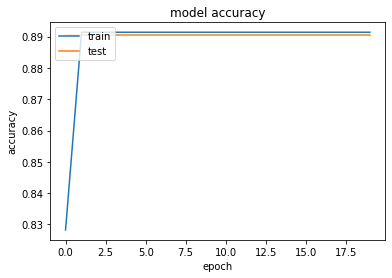

In [91]:
plt.plot(model6.history.history['accuracy'])
plt.plot(model6.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

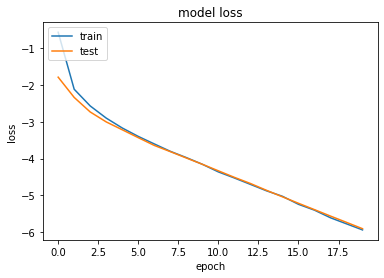

In [92]:
plt.plot(model6.history.history['loss'])
plt.plot(model6.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
file=pd.read_csv('Article_Data.txt',sep='\t')
data=file[['Article Abstract','Impact Factor']]
data_filtered = data.dropna(how='any')
data_filtered.columns=['abs','fac']
data_filtered=data_filtered.drop_duplicates(subset="abs")
data_filtered['result'] = data_filtered['abs'].str.replace(r'(formula: see text)','')
df = data_filtered[data_filtered['result'].apply(lambda x: len(x.split(' ')) > 25)]
final=df[['result','fac']]
final.columns=['abs','fac']
final_new = final[final.fac > 0]
X, y = (final_new['abs'].values, final_new['fac'].values)
text = [word for word in X if word not in string.ascii_letters]
tk = Tokenizer(lower = True)
tk.fit_on_texts(X)
X_seq = tk.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=1000, padding='post')
X_pad.shape
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size = 0.25, random_state = 1)
vocabulary_size = len(tk.word_counts.keys())+1

In [8]:
max_words = 1000
embedding_size = 100
model6 = Sequential()
model6.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model6.add(LSTM(100))
model6.add(Dropout(0.3))
model6.add(Dense(1, activation='sigmoid'))
model6.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model6.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=1000,epochs=20)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 9106 samples, validate on 3036 samples
Epoch 1/20
9106/9106 [==============================] - 217s 24ms/step - loss: -0.5849 - accuracy: 0.8579 - val_loss: -1.7489 - val_accuracy: 0.8906
Epoch 2/20
9106/9106 [==============================] - 208s 23ms/step - loss: -2.0343 - accuracy: 0.8914 - val_loss: -2.2621 - val_accuracy: 0.8906
Epoch 3/20
9106/9106 [==============================] - 213s 23ms/step - loss: -2.4452 - accuracy: 0.8914 - val_loss: -2.5438 - val_accuracy: 0.8906
Epoch 4/20
9106/9106 [==============================] - 210s 23ms/step - loss: -2.7014 - accuracy: 0.8914 - val_loss: -2.7734 - val_accuracy: 0.8906
Epoch 5/20
9106/9106 [==============================] - 209s 23ms/step - loss: -2.9144 - accuracy: 0.8914 - val_loss: -2.9909 - val_accuracy: 0.8906
Epoch 6/20
9106/9106 [==============================] - 211s 23ms/step - loss: -3.1398 - accuracy: 0.8914 - val_loss: -3.1956 - val_accuracy: 0.8906
Epoch 7/20
9106/9106 [==============================] - 21

In [0]:
trainPredict = model6.predict(X_train)
testPredict = model6.predict(X_test)

In [0]:
from math import sqrt

In [28]:
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(y_test, testPredict))
print('RMSE: %.3f' % rmse)

RMSE: 0.699


In [27]:
testPredict

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [29]:
train_acc1 = model6.evaluate(X_train, y_train)
test_acc1 = model6.evaluate(X_test, y_test)

3036/3036 [==============================] - 18s 6ms/step


In [30]:
rmse_train = sqrt(mean_squared_error(y_train, trainPredict))
print('RMSE: %.3f' % rmse)

RMSE: 0.699


In [31]:
test_acc1

[-5.634344868666256, 0.8906455636024475]

In [32]:
train_acc1

[-5.776830911793448, 0.8913902640342712]

In [0]:
file=pd.read_csv('Article_Data.txt',sep='\t')
data=file[['Article Abstract','Impact Factor']]
data_filtered = data.dropna(how='any')
data_filtered.columns=['abs','fac']
data_filtered=data_filtered.drop_duplicates(subset="abs")
data_filtered['result'] = data_filtered['abs'].str.replace(r'(formula: see text)','')
df = data_filtered[data_filtered['result'].apply(lambda x: len(x.split(' ')) > 25)]
final=df[['result','fac']]
final.columns=['abs','fac']
final_new = final[final.fac > 0]
X, y = (final_new['abs'].values, final_new['fac'].values)
text = [word for word in X if word not in string.ascii_letters]
tk = Tokenizer(lower = True)
tk.fit_on_texts(X)
X_seq = tk.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=1500, padding='post')
X_pad.shape
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size = 0.15, random_state = 1)
vocabulary_size = len(tk.word_counts.keys())+1

In [36]:
max_words = 1500
embedding_size = 100
model7 = Sequential()
model7.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model7.add(LSTM(100))
model7.add(Dropout(0.3))
model7.add(Dense(1, activation='sigmoid'))
model7.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model7.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=1000,epochs=20)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 10320 samples, validate on 1822 samples
Epoch 1/20
10320/10320 [==============================] - 349s 34ms/step - loss: -0.6953 - accuracy: 0.8328 - val_loss: -1.8096 - val_accuracy: 0.8930
Epoch 2/20
10320/10320 [==============================] - 337s 33ms/step - loss: -2.0790 - accuracy: 0.8909 - val_loss: -2.3899 - val_accuracy: 0.8930
Epoch 3/20
10320/10320 [==============================] - 340s 33ms/step - loss: -2.5316 - accuracy: 0.8909 - val_loss: -2.7140 - val_accuracy: 0.8930
Epoch 4/20
10320/10320 [==============================] - 337s 33ms/step - loss: -2.8234 - accuracy: 0.8909 - val_loss: -2.9691 - val_accuracy: 0.8930
Epoch 5/20
10320/10320 [==============================] - 338s 33ms/step - loss: -3.0832 - accuracy: 0.8909 - val_loss: -3.1992 - val_accuracy: 0.8930
Epoch 6/20
10320/10320 [==============================] - 332s 32ms/step - loss: -3.2922 - accuracy: 0.8909 - val_loss: -3.4167 - val_accuracy: 0.8930
Epoch 7/20
10320/10320 [=====================

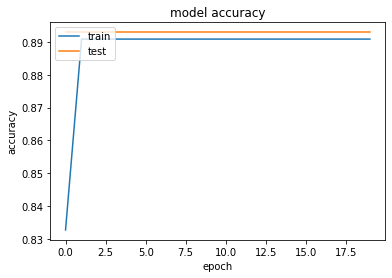

In [37]:
plt.plot(model7.history.history['accuracy'])
plt.plot(model7.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

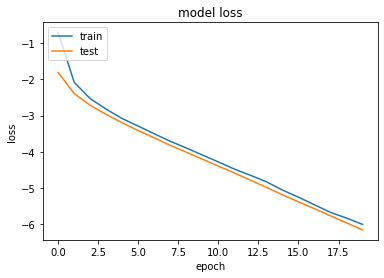

In [38]:
plt.plot(model7.history.history['loss'])
plt.plot(model7.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
trainPredict = model7.predict(X_train)
testPredict = model7.predict(X_test)

In [40]:
rmse_train = sqrt(mean_squared_error(y_train, trainPredict))
print('RMSE: %.3f' % rmse)
rmse_test = sqrt(mean_squared_error(y_test, testPredict))
print('RMSE: %.3f' % rmse)


RMSE: 0.699
RMSE: 0.699
